# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create empty array
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# start of the print
print("Beginning Data Retrieval")
print("-----------------------------")

# start counter
count = 0

for citi in cities:
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={citi}&units={units}"
    
    # Get weather data
    weather_json = requests.get(query_url).json()
    
    # increase count
    count += 1

    try:
        #print city name
        name = weather_json["name"]
        print(f"Processing Record {count} of {len(cities)}: {name}")
        
        #append arrays
        city.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        
    except:
        print("City not found. Skipping...")
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 616: Ushuaia
City not found. Skipping...
Processing Record 3 of 616: Mareeba
Processing Record 4 of 616: Shingū
Processing Record 5 of 616: Punta Arenas
Processing Record 6 of 616: Ankazoabo
City not found. Skipping...
Processing Record 8 of 616: Norman Wells
Processing Record 9 of 616: Atuona
Processing Record 10 of 616: Jérémie
Processing Record 11 of 616: Carnarvon
Processing Record 12 of 616: Bintulu
Processing Record 13 of 616: Mataura
Processing Record 14 of 616: Khatanga
Processing Record 15 of 616: Bredasdorp
Processing Record 16 of 616: Nanortalik
Processing Record 17 of 616: Umluj
Processing Record 18 of 616: Valle de Allende
Processing Record 19 of 616: Pastavy
Processing Record 20 of 616: Union
Processing Record 21 of 616: Mékhé
Processing Record 22 of 616: Rikitea
Processing Record 23 of 616: Castro
Processing Record 24 of 616: Luganville
Processing Record 25 of 616: Amapá
Processing Record 26 of

Processing Record 218 of 616: Beloha
Processing Record 219 of 616: Mar del Plata
Processing Record 220 of 616: Chernyshevskiy
Processing Record 221 of 616: Qui Nhon
City not found. Skipping...
Processing Record 223 of 616: Sitka
City not found. Skipping...
Processing Record 225 of 616: Shimoda
Processing Record 226 of 616: Randolph
Processing Record 227 of 616: Sinnamary
Processing Record 228 of 616: Ambilobe
Processing Record 229 of 616: Alice Springs
Processing Record 230 of 616: Vega de Alatorre
Processing Record 231 of 616: Riyadh
Processing Record 232 of 616: La Ronge
Processing Record 233 of 616: Prince Rupert
Processing Record 234 of 616: Butaritari
Processing Record 235 of 616: Galich
Processing Record 236 of 616: Bilibino
Processing Record 237 of 616: Haines Junction
Processing Record 238 of 616: Kavieng
Processing Record 239 of 616: Dolinsk
Processing Record 240 of 616: Aripuanã
Processing Record 241 of 616: Longyearbyen
Processing Record 242 of 616: Rodolfo Sánchez Taboada
P

Processing Record 429 of 616: Boulder
Processing Record 430 of 616: Khani
Processing Record 431 of 616: Asău
Processing Record 432 of 616: Ferentino
Processing Record 433 of 616: Carballo
Processing Record 434 of 616: Uíge
Processing Record 435 of 616: Raja
Processing Record 436 of 616: Barcelos
Processing Record 437 of 616: Kununurra
Processing Record 438 of 616: Āwash
Processing Record 439 of 616: Balakovo
Processing Record 440 of 616: Margate
Processing Record 441 of 616: Ocós
Processing Record 442 of 616: Severo-Kuril'sk
Processing Record 443 of 616: Giresun Province
Processing Record 444 of 616: Lichuan
Processing Record 445 of 616: Fort Nelson
Processing Record 446 of 616: Arandis
Processing Record 447 of 616: Atar
Processing Record 448 of 616: Souillac
City not found. Skipping...
City not found. Skipping...
Processing Record 451 of 616: Kurumkan
Processing Record 452 of 616: Guangzhou
Processing Record 453 of 616: Esperance
Processing Record 454 of 616: Gävle
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating a dataFrame

weather_df = pd.DataFrame({
     'City':city,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temp':max_temp,
     'Wind Speed':wind_speed,
     })

#writing DF output to CSV file
weather_df.to_csv(output_data_file)

#Getting the count of data
weather_df.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [5]:
# Print dataframe
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,67,AR,1587954096,69,-54.80,-68.30,39.20,11.41
1,Mareeba,0,AU,1587954054,63,-17.00,145.43,86.00,5.99
2,Shingū,40,JP,1587954096,59,33.73,135.98,62.60,12.75
3,Punta Arenas,15,CL,1587954096,74,-53.15,-70.92,32.00,4.70
4,Ankazoabo,19,MG,1587954097,75,-22.28,44.52,63.52,7.58
...,...,...,...,...,...,...,...,...,...
560,Tomatlán,1,MX,1587954150,57,19.93,-105.25,71.78,2.19
561,Killybegs,1,IE,1587954150,74,54.63,-8.45,45.90,3.96
562,Lincoln,100,US,1587954095,56,40.80,-96.67,63.00,4.00
563,Pierre,1,US,1587954150,39,44.37,-100.35,68.00,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

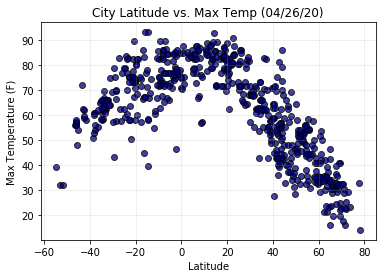

In [6]:

# Creating a function to enter y-axis values from the Weather DataFrame and creates a Scatter plot

def scatter_plot_by_lat(y_axis_values,y_axis_label):
    Plot_Data = plt.scatter(weather_df['Lat'],weather_df[y_axis_values],alpha=0.75,facecolors = 'navy', edgecolors='black')
    
    #title that also shows the current date using a function from time module     
    plt.title(f"City Latitude vs. {y_axis_values} ({time.strftime('%m/%d/%y')})")
    
    #Labels     
    plt.xlabel('Latitude')
    plt.ylabel(y_axis_label)
    plt.grid(alpha = 0.25)
    
    #saving image
    plt.savefig(f'output_data/Latitude_vs_{y_axis_values}.png')
    
#calling the Scatterplot function for Max Temparature values     
lat_vs_temp = scatter_plot_by_lat('Max Temp','Max Temperature (F)')
plt.show()

#### Latitude vs. Humidity Plot

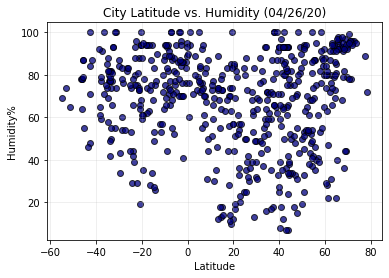

In [7]:
#calling the Scatterplot function for Humidity values     
lat_vs_temp = scatter_plot_by_lat('Humidity','Humidity%')
plt.show()

#### Latitude vs. Cloudiness Plot

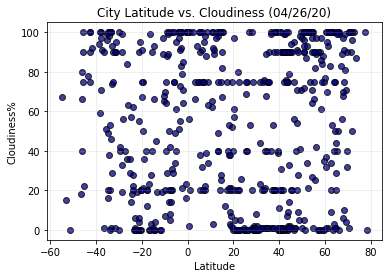

In [8]:
#calling the Scatterplot function for Humidity values     
lat_vs_temp = scatter_plot_by_lat('Cloudiness','Cloudiness%')
plt.show()

#### Latitude vs. Wind Speed Plot

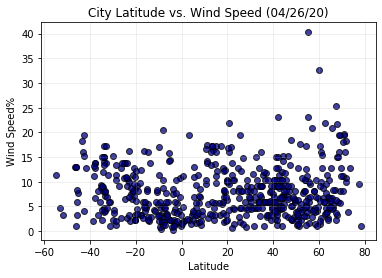

In [9]:
#calling the Scatterplot function for Humidity values     
lat_vs_temp = scatter_plot_by_lat('Wind Speed','Wind Speed%')
plt.show()

## Linear Regression

In [10]:
# Create a function that takes y-axis values from the DataFrame and creates a Linear Regression model

def linRegress_plot_by_lat(df_name,y_axis_values,y_axis_label):
    Plot_Data = plt.scatter(df_name['Lat'],df_name[y_axis_values],alpha=0.75,facecolors = 'brown', edgecolors='black')
    
    # Perform a linear regression with latitude as x values and get y values from function parameter
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df_name['Lat'], df_name[y_axis_values])

    # Get regression values
    regress_values = df_name['Lat'] * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #title that also shows the current date using a function from time module     
    plt.title(f"{df_name.name} Hemisphere - {y_axis_label} vs. Latitude Linear Regression ({time.strftime('%m/%d/%y')})")
    plt.plot(df_name['Lat'],regress_values,"r-")
    x_annonate = min(df_name['Lat']) + 10
    y_annonate = min(df_name[y_axis_values]) + 30
    plt.annotate(line_eq,(x_annonate,y_annonate),fontsize=10,color="red")
    print(f"The r-squared is: {rvalue}")
    print(f"The Line Equation is: {line_eq}")
    
    #Labels     
    plt.xlabel('Latitude')
    plt.ylabel(y_axis_label)
    plt.grid(alpha = 0.25)
    
    #saving image
    plt.savefig(f'output_data/{df_name.name} Hemisphere {y_axis_values}_vs_Latitude_Linear_Regression.png')


In [11]:
# Create Northern and Southern Hemisphere DataFrames
Northern = weather_df.loc[weather_df["Lat"]>=0]
Southern = weather_df.loc[weather_df["Lat"]<0]
Northern.name = 'Northern'
Southern.name = 'Southern'


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8829739427149494
The Line Equation is: y = -0.9x +93.13


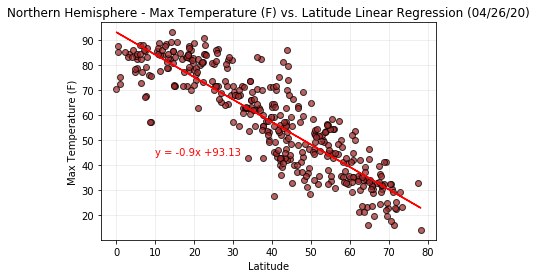

In [12]:
linRegress_plot_by_lat(Northern,'Max Temp','Max Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6185325901685266
The Line Equation is: y = 0.52x +80.4


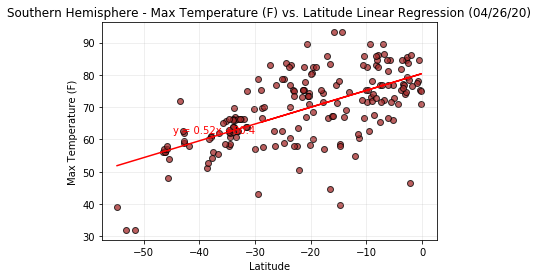

In [13]:
linRegress_plot_by_lat(Southern,'Max Temp','Max Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20806467906610027
The Line Equation is: y = 0.26x +55.0


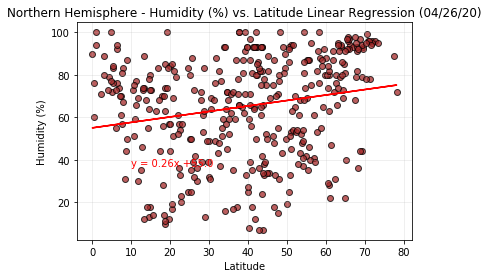

In [14]:
linRegress_plot_by_lat(Northern,'Humidity','Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11838945385094925
The Line Equation is: y = 0.15x +77.21


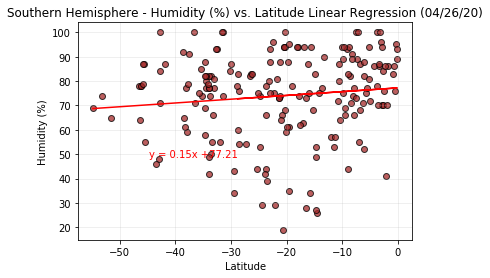

In [15]:
linRegress_plot_by_lat(Southern,'Humidity','Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12728133386262533
The Line Equation is: y = 0.25x +42.72


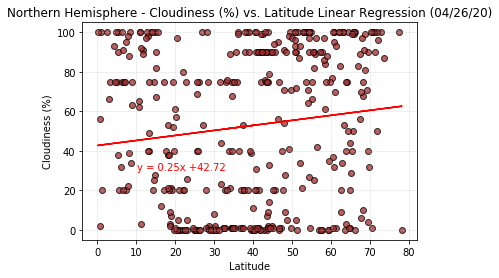

In [16]:
linRegress_plot_by_lat(Northern,'Cloudiness','Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.04663781597455862
The Line Equation is: y = -0.13x +49.81


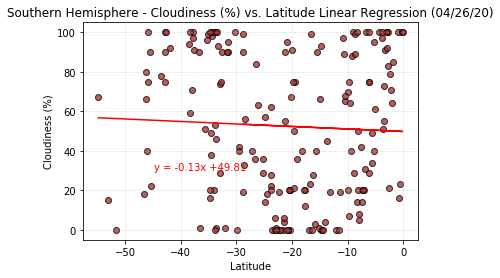

In [17]:
linRegress_plot_by_lat(Southern,'Cloudiness','Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10346829730662373
The Line Equation is: y = 0.03x +6.9


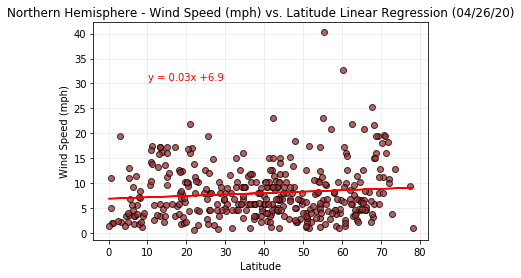

In [18]:
linRegress_plot_by_lat(Northern,'Wind Speed','Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3517797820190622
The Line Equation is: y = -0.12x +4.75


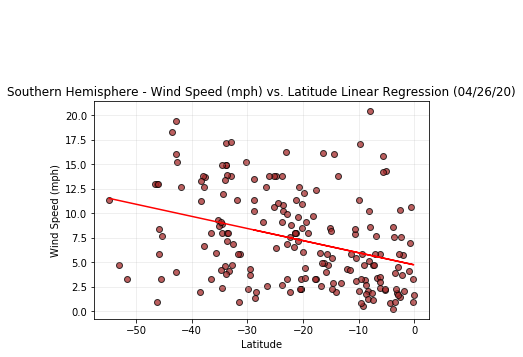

In [19]:
linRegress_plot_by_lat(Southern,'Wind Speed','Wind Speed (mph)')
plt.show()